In [1]:
import requests
import pandas as pd
import numpy as np
from strategy import MlDt

# Download data

In [2]:
PARAMS = {"backtest": "all"}
df = requests.get(
    "https://aipricepatterns.com/api/api/backtest", params=PARAMS)
data = df.json()['backtest']
data = pd.DataFrame(data)
data = data.rename(columns={'Time': 'time', 'Close': 'close'})
data = data.set_index('time')
data.index = pd.to_datetime(data.index)

In [4]:
data.head(2)

,close,Cumsum,High,Lag,Lag_short,Low,Open,Results,Rule,Rule_short,Signal,Signal_short,Volume
time,,,,,,,,,,,,,
2020-11-12 01:00:00+00:00,15609.36,0.00,15640.00,0,0,15600.65,15635.50,0.00,no,no,0,0,0.0
2020-11-12 01:05:00+00:00,15611.50,0.01,15614.89,180,0,15584.77,15609.36,0.01,Long33330,no,1,0,0.0


## Create Machine Learning object

In [14]:
# Create startegy
strategy_ml = MlDt(threshold=0.003)


## Create Rules for Mean Reversing strategy

In [6]:
strategy_ml._save_rules(
    data=data,
    rules=100,
    reverse=True
)

Rules:  1
Backtest result:  0.8392603840568199
Rules:  2
Backtest result:  0.6573111155591422
Rules:  3
Backtest result:  0.4883277988739929
Rules:  4
Backtest result:  0.5149834477975388
Rules:  5
Backtest result:  0.7222657098413462
Rules:  6
Backtest result:  0.6881501106573954
Rules:  7
Backtest result:  0.5942421262335666
Rules:  8
Backtest result:  0.622456743490053
Rules:  9
Backtest result:  0.6857088989508544
Rules:  10
Backtest result:  0.5397224753853271
Rules:  11
Backtest result:  0.5832581438276844
Rules:  12
Backtest result:  0.6132562496851464
Rules:  13
Backtest result:  0.6149533848004589
Rules:  14
Backtest result:  0.6269221097710672
Rules:  15
Backtest result:  0.5853545068961881
Rules:  16
Backtest result:  0.620542637774253
Rules:  17
Backtest result:  0.45193121353235566
Rules:  18
Backtest result:  0.5783844129340517
Rules:  19
Backtest result:  0.6280913573399295
Rules:  20
Backtest result:  0.6279806317985492
Rules:  21
Backtest result:  0.45014123040977416
R

## Create Machine learning model

2021-02-14 14:30:41.039 | INFO     | strategy:backtest:378 - Backtest using signal method


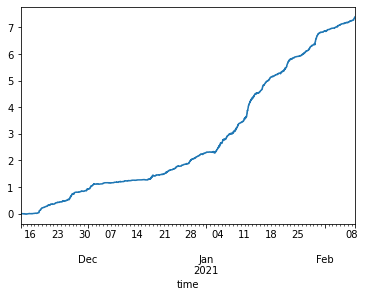

In [15]:
strategy_ml.create_machine_learning_models(data=data, split_train=1)

## Backtest

2021-02-14 14:38:15.222 | INFO     | strategy:backtest:378 - Backtest using signal method


<AxesSubplot:xlabel='time'>

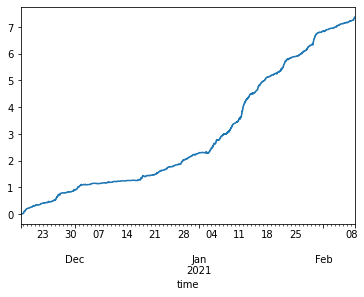

In [20]:
data = strategy_ml.backtest(data=data, comission=0.001,  takeProfit=0.005,
                lag=1, stopLoss=-0.005, exitPosition="signal", ml=True)
data['cumsum'].plot()

<AxesSubplot:xlabel='time'>

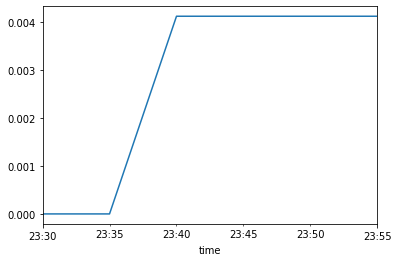

In [28]:
data.last('30Min')['return'].cumsum().plot() # 1D, 1M, 1W, 5Min, 

In [38]:
data.loc[data['signal'] != 0, 'signal'].value_counts(normalize=True) # balance situation 50 / 50. it is target

 1    0.519449
-1    0.480551
Name: signal, dtype: float64

In [45]:
data.loc[:, 'count_return'] = np.where(data['return'] > 0, 1, data['return'])
data.loc[:, 'count_return'] = np.where(data['return'] < 0, -1, data['count_return'])
data.loc[data['count_return'] !=0, 'count_return'].value_counts(normalize=True)

 1.0    0.84227
-1.0    0.15773
Name: count_return, dtype: float64